<a href="https://colab.research.google.com/github/aryadevilistiani/Employees_Database/blob/master/Data_Training_Klasifikasi_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.2 MB/s eta 0:00:00


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.5 MB/s eta 0:00:00


In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string
import emoji
import contractions
import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/data_komentar_instagram.csv')
df

,Label,Komentar
0,ham,Slide pertama menggambarkan masa depan 🤩
1,ham,Foto keluarga bgt yg slide 1 ya al😂🤣 aamiin ya...
2,ham,Sukses ya Al sama seriesnya. Anak kecilnya gem...
3,spam,wiiii🔥
4,ham,"Lily napa cocok bgt jadi anak alamanda, mirip ..."
...,...,...
2796,spam,Tolong dong barangkali ada yg punya solusi bua...
2797,spam,Moms sharing dong ada yang lagi program diet d...
2798,ham,Aku uda nonton banguss bangetttt 🥰🥰🥰
2799,ham,Sudahhhhh 👏👏👏 buat yg belom wajib nonton


In [ ]:
# Mengubah text menjadi lower Case Folding
df['Komentar'] = df['Komentar'].str.lower()
df

,Label,Komentar
0,ham,slide pertama menggambarkan masa depan 🤩
1,ham,foto keluarga bgt yg slide 1 ya al😂🤣 aamiin ya...
2,ham,sukses ya al sama seriesnya. anak kecilnya gem...
3,spam,wiiii🔥
4,ham,"lily napa cocok bgt jadi anak alamanda, mirip ..."
...,...,...
2796,spam,tolong dong barangkali ada yg punya solusi bua...
2797,spam,moms sharing dong ada yang lagi program diet d...
2798,ham,aku uda nonton banguss bangetttt 🥰🥰🥰
2799,ham,sudahhhhh 👏👏👏 buat yg belom wajib nonton


In [ ]:
# Cleansing
def cleansing(text):
    #Replace Rt Tag
    t1 = re.sub('RT\s', '',text)
    #Replace @_username
    t2 = re.sub('\B@\w+', "", t1)
    #Replace emojs with text
    t3 = emoji.demojize(t2)
    #Replace URL (http:// or https://)
    t4 = re.sub('(http|https):\/\/\S+', '',t3)
    #Replace #_something_
    t5 = re.sub('#+', '',t4)
    #lower case each letter
    t6 = t5.lower()
    #Replace word repetition with a single occurance ('ooooooooooo' becomse'oo')
    t7 = re.sub(r'(.)\1+', r'\1\1',t6)
    #Replace punctuation repetition with a singleoccurance ('!!!!!!!!!!'becomes'!')
    t8 = re.sub(r'[\?\.\!]+(?=[\?.\!])', '', t7)
    #Alphabets only,exclude numbers and special characters
    t9 = re.sub(r'[^a-zA-Z]', ' ',t8)
    #Replace contractions with their extended forms
    t10 = contractions.fix(t9)
    return t10

In [ ]:
for i, r in df.iterrows():
    y = cleansing(r['Komentar'])
    df.loc[i, 'clean_komentar'] = y
df

,Label,Komentar,clean_komentar
0,ham,slide pertama menggambarkan masa depan 🤩,slide pertama menggambarkan masa depan star s...
1,ham,foto keluarga bgt yg slide 1 ya al😂🤣 aamiin ya...,foto keluarga bgt yg slide ya al face with t...
2,ham,sukses ya al sama seriesnya. anak kecilnya gem...,sukses ya al sama seriesnya anak kecilnya gem...
3,spam,wiiii🔥,wii fire
4,ham,"lily napa cocok bgt jadi anak alamanda, mirip ...",lily napa cocok bgt jadi anak alamanda mirip ...
...,...,...,...
2796,spam,tolong dong barangkali ada yg punya solusi bua...,tolong dong barangkali ada yg punya solusi bua...
2797,spam,moms sharing dong ada yang lagi program diet d...,moms sharing dong ada yang lagi program diet d...
2798,ham,aku uda nonton banguss bangetttt 🥰🥰🥰,aku uda nonton banguss bangett smiling face w...
2799,ham,sudahhhhh 👏👏👏 buat yg belom wajib nonton,sudahh clapping hands clapping hands clappi...


In [ ]:
#Menghapus kata duplicate
#df.drop_duplicates(subset=['newkomentar'], keep='first', inplace=True)
#df

In [ ]:
from pandas.io.formats.info import DataFrameTableBuilderVerbose
#Tokenization (memisahkan kata)
def tokenization(clean_komentar):
  text = re.split('\W+',clean_komentar)
  return text
df['TOKENIZATION'] = df['clean_komentar'].apply(lambda x:tokenization(x.lower()))
df

,Label,Komentar,clean_komentar,TOKENIZATION
0,ham,slide pertama menggambarkan masa depan 🤩,slide pertama menggambarkan masa depan star s...,"[slide, pertama, menggambarkan, masa, depan, s..."
1,ham,foto keluarga bgt yg slide 1 ya al😂🤣 aamiin ya...,foto keluarga bgt yg slide ya al face with t...,"[foto, keluarga, bgt, yg, slide, ya, al, face,..."
2,ham,sukses ya al sama seriesnya. anak kecilnya gem...,sukses ya al sama seriesnya anak kecilnya gem...,"[sukses, ya, al, sama, seriesnya, anak, keciln..."
3,spam,wiiii🔥,wii fire,"[wii, fire, ]"
4,ham,"lily napa cocok bgt jadi anak alamanda, mirip ...",lily napa cocok bgt jadi anak alamanda mirip ...,"[lily, napa, cocok, bgt, jadi, anak, alamanda,..."
...,...,...,...,...
2796,spam,tolong dong barangkali ada yg punya solusi bua...,tolong dong barangkali ada yg punya solusi bua...,"[tolong, dong, barangkali, ada, yg, punya, sol..."
2797,spam,moms sharing dong ada yang lagi program diet d...,moms sharing dong ada yang lagi program diet d...,"[moms, sharing, dong, ada, yang, lagi, program..."
2798,ham,aku uda nonton banguss bangetttt 🥰🥰🥰,aku uda nonton banguss bangett smiling face w...,"[aku, uda, nonton, banguss, bangett, smiling, ..."
2799,ham,sudahhhhh 👏👏👏 buat yg belom wajib nonton,sudahh clapping hands clapping hands clappi...,"[sudahh, clapping, hands, clapping, hands, cla..."


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
#Stop Removal (menghapus data yang tidak penting)
stopword = nltk.corpus.stopwords.words('/content/drive/MyDrive/Dataset/stopwords_id.txt')
def remove_stopwords(newKomentar):
  newKomentar = [word for word in newKomentar if word not in stopword]
  return newKomentar
df['STOP_REMOVAL'] = df['TOKENIZATION'].apply(lambda x: remove_stopwords(x))
df

,Label,Komentar,clean_komentar,TOKENIZATION,STOP_REMOVAL
0,ham,slide pertama menggambarkan masa depan 🤩,slide pertama menggambarkan masa depan star s...,"[slide, pertama, menggambarkan, masa, depan, s...","[slide, pertama, menggambarkan, masa, star, st..."
1,ham,foto keluarga bgt yg slide 1 ya al😂🤣 aamiin ya...,foto keluarga bgt yg slide ya al face with t...,"[foto, keluarga, bgt, yg, slide, ya, al, face,...","[foto, keluarga, bgt, yg, slide, ya, al, face,..."
2,ham,sukses ya al sama seriesnya. anak kecilnya gem...,sukses ya al sama seriesnya anak kecilnya gem...,"[sukses, ya, al, sama, seriesnya, anak, keciln...","[sukses, ya, al, seriesnya, anak, kecilnya, ge..."
3,spam,wiiii🔥,wii fire,"[wii, fire, ]","[wii, fire, ]"
4,ham,"lily napa cocok bgt jadi anak alamanda, mirip ...",lily napa cocok bgt jadi anak alamanda mirip ...,"[lily, napa, cocok, bgt, jadi, anak, alamanda,...","[lily, napa, cocok, bgt, jadi, anak, alamanda,..."
...,...,...,...,...,...
2796,spam,tolong dong barangkali ada yg punya solusi bua...,tolong dong barangkali ada yg punya solusi bua...,"[tolong, dong, barangkali, ada, yg, punya, sol...","[tolong, barangkali, yg, punya, solusi, bb, ku..."
2797,spam,moms sharing dong ada yang lagi program diet d...,moms sharing dong ada yang lagi program diet d...,"[moms, sharing, dong, ada, yang, lagi, program...","[moms, sharing, program, diet, ngilangin, peru..."
2798,ham,aku uda nonton banguss bangetttt 🥰🥰🥰,aku uda nonton banguss bangett smiling face w...,"[aku, uda, nonton, banguss, bangett, smiling, ...","[uda, nonton, banguss, bangett, smiling, face,..."
2799,ham,sudahhhhh 👏👏👏 buat yg belom wajib nonton,sudahh clapping hands clapping hands clappi...,"[sudahh, clapping, hands, clapping, hands, cla...","[sudahh, clapping, hands, clapping, hands, cla..."


In [ ]:
!pip install Swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=dc140b36b7237317b174443e4283038eccd98eadd3ae6b6b73e72dabcd852b7b
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built Swifter


In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.5 MB/s eta 0:00:00


In [ ]:
#Stemmer (mengubah kata dasar)
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

#create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
for document in df['TOKENIZATION']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("--------------------")

#apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['STEMMED'] = df['TOKENIZATION'].swifter.apply(get_stemmed_term)
print(df['STEMMED'])
# Menggabungkan kembali menjadi teks
#stemmed_text = ' '.join(STEMMED)





4766
------------------
slide : slide
pertama : pertama
menggambarkan : gambar
masa : masa
depan : depan
star : star
struck : struck
 : 
foto : foto
keluarga : keluarga
bgt : bgt
yg : yg
ya : ya
al : al
face : face
with : with
tears : tears
of : of
joy : joy
rolling : rolling
on : on
the : the
floor : floor
laughing : laughing
aamiin : aamiin
yaa : yaa
semoga : moga
ntr : ntr
jadi : jadi
kenyataan : nyata
itu : itu
palms : palms
up : up
together : together
light : light
skin : skin
tone : tone
sukses : sukses
sama : sama
seriesnya : seriesnya
anak : anak
kecilnya : kecil
gemes : gemes
wii : wii
fire : fire
lily : lily
napa : napa
cocok : cocok
alamanda : alamanda
mirip : mirip
kombinasi : kombinasi
nyaa : nyaa
holding : holding
back : back
see : see
no : no
evil : evil
monkey : monkey
berasa : asa
liat : liat
kecil : kecil
beneran : beneran
smiling : smiling
heart : heart
eyes : eyes
hearts : hearts
kayaknya : kayak
emy : emy
ni : ni
nya : nya
amanda : amanda
pinching : pinching
hand :

Pandas Apply:   0%|          | 0/2801 [00:00<?, ?it/s]

0       [slide, pertama, gambar, masa, depan, star, st...
1       [foto, keluarga, bgt, yg, slide, ya, al, face,...
2       [sukses, ya, al, sama, seriesnya, anak, kecil,...
3                                           [wii, fire, ]
4       [lily, napa, cocok, bgt, jadi, anak, alamanda,...
                              ...                        
2796    [tolong, dong, barangkali, ada, yg, punya, sol...
2797    [moms, sharing, dong, ada, yang, lagi, program...
2798    [aku, uda, nonton, banguss, bangett, smiling, ...
2799    [sudahh, clapping, hands, clapping, hands, cla...
2800    [haha, cip, ngakak, bgtt, tapi, proud, of, you...
Name: STEMMED, Length: 2801, dtype: object


In [ ]:
#print("Hasil stemming:", stemmed_text)
df['STEMMED_TEXT'] = df['STEMMED'].str.join(" ")
df['STEMMED_TEXT']

0            slide pertama gambar masa depan star struck 
1       foto keluarga bgt yg slide ya al face with tea...
2        sukses ya al sama seriesnya anak kecil gemes bgt
3                                               wii fire 
4       lily napa cocok bgt jadi anak alamanda mirip k...
                              ...                        
2796    tolong dong barangkali ada yg punya solusi bua...
2797    moms sharing dong ada yang lagi program diet d...
2798    aku uda nonton banguss bangett smiling face wi...
2799    sudahh clapping hands clapping hands clapping ...
2800    haha cip ngakak bgtt tapi proud of you sekaran...
Name: STEMMED_TEXT, Length: 2801, dtype: object

In [ ]:
df.to_csv("data_preprocessing.csv")
df

,Label,Komentar,clean_komentar,TOKENIZATION,STOP_REMOVAL,STEMMED,STEMMED_TEXT
0,ham,slide pertama menggambarkan masa depan 🤩,slide pertama menggambarkan masa depan star s...,"[slide, pertama, menggambarkan, masa, depan, s...","[slide, pertama, menggambarkan, masa, star, st...","[slide, pertama, gambar, masa, depan, star, st...",slide pertama gambar masa depan star struck
1,ham,foto keluarga bgt yg slide 1 ya al😂🤣 aamiin ya...,foto keluarga bgt yg slide ya al face with t...,"[foto, keluarga, bgt, yg, slide, ya, al, face,...","[foto, keluarga, bgt, yg, slide, ya, al, face,...","[foto, keluarga, bgt, yg, slide, ya, al, face,...",foto keluarga bgt yg slide ya al face with tea...
2,ham,sukses ya al sama seriesnya. anak kecilnya gem...,sukses ya al sama seriesnya anak kecilnya gem...,"[sukses, ya, al, sama, seriesnya, anak, keciln...","[sukses, ya, al, seriesnya, anak, kecilnya, ge...","[sukses, ya, al, sama, seriesnya, anak, kecil,...",sukses ya al sama seriesnya anak kecil gemes bgt
3,spam,wiiii🔥,wii fire,"[wii, fire, ]","[wii, fire, ]","[wii, fire, ]",wii fire
4,ham,"lily napa cocok bgt jadi anak alamanda, mirip ...",lily napa cocok bgt jadi anak alamanda mirip ...,"[lily, napa, cocok, bgt, jadi, anak, alamanda,...","[lily, napa, cocok, bgt, jadi, anak, alamanda,...","[lily, napa, cocok, bgt, jadi, anak, alamanda,...",lily napa cocok bgt jadi anak alamanda mirip k...
...,...,...,...,...,...,...,...
2796,spam,tolong dong barangkali ada yg punya solusi bua...,tolong dong barangkali ada yg punya solusi bua...,"[tolong, dong, barangkali, ada, yg, punya, sol...","[tolong, barangkali, yg, punya, solusi, bb, ku...","[tolong, dong, barangkali, ada, yg, punya, sol...",tolong dong barangkali ada yg punya solusi bua...
2797,spam,moms sharing dong ada yang lagi program diet d...,moms sharing dong ada yang lagi program diet d...,"[moms, sharing, dong, ada, yang, lagi, program...","[moms, sharing, program, diet, ngilangin, peru...","[moms, sharing, dong, ada, yang, lagi, program...",moms sharing dong ada yang lagi program diet d...
2798,ham,aku uda nonton banguss bangetttt 🥰🥰🥰,aku uda nonton banguss bangett smiling face w...,"[aku, uda, nonton, banguss, bangett, smiling, ...","[uda, nonton, banguss, bangett, smiling, face,...","[aku, uda, nonton, banguss, bangett, smiling, ...",aku uda nonton banguss bangett smiling face wi...
2799,ham,sudahhhhh 👏👏👏 buat yg belom wajib nonton,sudahh clapping hands clapping hands clappi...,"[sudahh, clapping, hands, clapping, hands, cla...","[sudahh, clapping, hands, clapping, hands, cla...","[sudahh, clapping, hands, clapping, hands, cla...",sudahh clapping hands clapping hands clapping ...


In [ ]:
#Pembagian Dataset
import pandas as pd
from sklearn.model_selection import train_test_split

# Baca dataset
data = pd.read_csv('data_preprocessing.csv')  # lokasi file CSV data sudah di processing
comments = data['TOKENIZATION']
labels = data['Label']

# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(comments, labels, test_size=0.3, random_state=42)

# Tampilkan ukuran setiap subset
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 1960
Jumlah data uji: 841


In [ ]:
#Cross Validation
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset using pandas
# Replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('data_preprocessing.csv')

# Assuming your dataset has 'text' column for comments and 'label' column for labels
comments = data['STEMMED']
labels = data['Label']

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Convert text comments to numerical feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments)

# Initialize K-Fold cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
fold_metrics = []

# Perform 10-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize the SVM model
    svm_model = SVC(kernel='linear')

    # Fit the model on the training data
    svm_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = svm_model.predict(X_test)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append metrics to list for this fold
    fold_metrics.append([fold, accuracy, precision, recall, f1])

# Create a DataFrame to display the results
results_df = pd.DataFrame(fold_metrics, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Print the results table
print(results_df)


   Fold  Accuracy  Precision    Recall  F1-Score
0     1  0.843416   0.582278  0.807018  0.676471
1     2  0.878571   0.722892  0.845070  0.779221
2     3  0.892857   0.683544  0.915254  0.782609
3     4  0.896429   0.725000  0.892308  0.800000
4     5  0.885714   0.722892  0.869565  0.789474
5     6  0.892857   0.671053  0.910714  0.772727
6     7  0.871429   0.698630  0.784615  0.739130
7     8  0.867857   0.675000  0.830769  0.744828
8     9  0.889286   0.621622  0.938776  0.747967
9    10  0.910714   0.797297  0.855072  0.825175


In [ ]:
#Cross Validation dengan kernel RBF
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Load your dataset using pandas
# Replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('data_preprocessing.csv')

# Assuming your dataset has 'text' column for comments and 'label' column for labels
comments = data['STEMMED']
labels = data['Label']

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Convert text comments to numerical feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments)

# Initialize K-Fold cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
fold_metrics = []

# Perform 10-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize the SVM model with RBF kernel
    svm_model = SVC(kernel='rbf')

    # Fit the model on the training data
    svm_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = svm_model.predict(X_test)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    # Append metrics to list for this fold
    fold_metrics.append([fold, accuracy, precision, recall, f1])

# Create a DataFrame to display the results
results_df = pd.DataFrame(fold_metrics, columns=['Fold', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)'])

# Print the results table
print(results_df)



   Fold  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0     1     82.562278      59.090909   45.614035     51.485149
1     2     86.428571      78.947368   63.380282     70.312500
2     3     90.714286      90.243902   62.711864     74.000000
3     4     88.571429      86.666667   60.000000     70.909091
4     5     86.428571      80.392157   59.420290     68.333333
5     6     89.285714      76.000000   67.857143     71.698113
6     7     83.214286      72.500000   44.615385     55.238095
7     8     87.142857      79.591837   60.000000     68.421053
8     9     90.357143      77.500000   63.265306     69.662921
9    10     86.785714      86.363636   55.072464     67.256637


In [ ]:
#RBF dan Confusin matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Load your dataset using pandas
# Replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('data_preprocessing.csv')

# Assuming your dataset has 'text' column for comments and 'label' column for labels
comments = data['STEMMED']
labels = data['Label']

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Convert text comments to numerical feature vectors using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(comments)

# Initialize K-Fold cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics and confusion matrices for each fold
fold_metrics = []

# Perform 10-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize the SVM model with RBF kernel
    svm_model = SVC(kernel='rbf')

    # Fit the model on the training data
    svm_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = svm_model.predict(X_test)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Convert confusion matrix values to percentages
    cm_percent = (cm / cm.sum()) * 100

    # Append metrics and confusion matrix to list for this fold
    fold_metrics.append([fold, accuracy*100, precision*100, recall*100, f1*100, cm_percent])

# Create a DataFrame to display the results
results_df = pd.DataFrame(fold_metrics, columns=['Fold', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)', 'Confusion Matrix (%)'])

# Print the results table
print(results_df)


   Fold  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)  \
0     1     82.562278      59.090909   45.614035     51.485149   
1     2     86.428571      78.947368   63.380282     70.312500   
2     3     90.714286      90.243902   62.711864     74.000000   
3     4     88.571429      86.666667   60.000000     70.909091   
4     5     86.428571      80.392157   59.420290     68.333333   
5     6     89.285714      76.000000   67.857143     71.698113   
6     7     83.214286      72.500000   44.615385     55.238095   
7     8     87.142857      79.591837   60.000000     68.421053   
8     9     90.357143      77.500000   63.265306     69.662921   
9    10     86.785714      86.363636   55.072464     67.256637   

                                Confusion Matrix (%)  
0  [[73.30960854092527, 6.405693950177936], [11.0...  
1  [[70.35714285714286, 4.285714285714286], [9.28...  
2  [[77.5, 1.4285714285714286], [7.85714285714285...  
3  [[74.64285714285714, 2.142857142857143], [9.28... 

In [ ]:
#implementasi yang mencakup pembagian dataset menjadi data latih (train) dan data uji (test), perhitungan TF-IDF, penggunaan kernel RBF dengan penghitungan confusion matrix, serta pengujian menggunakan k-fold cross-validation dengan nilai dalam bentuk persentase
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load your dataset using pandas
# Replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('data_preprocessing.csv')

# Assuming your dataset has 'text' column for comments and 'label' column for labels
comments = data['STEMMED']
labels = data['Label']

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(comments, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert text comments to TF-IDF feature vectors for train and test sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize K-Fold cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics and confusion matrices for each fold
fold_metrics = []

# Perform 10-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train_tfidf), start=1):
    X_fold_train, X_fold_val = X_train_tfidf[train_index], X_train_tfidf[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Initialize the SVM model with RBF kernel
    svm_model = SVC(kernel='rbf')

    # Fit the model on the training data for this fold
    svm_model.fit(X_fold_train, y_fold_train)

    # Make predictions on the validation data
    y_pred_val = svm_model.predict(X_fold_val)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_fold_val, y_pred_val)
    precision = precision_score(y_fold_val, y_pred_val)
    recall = recall_score(y_fold_val, y_pred_val)
    f1 = f1_score(y_fold_val, y_pred_val)

    # Calculate confusion matrix
    cm = confusion_matrix(y_fold_val, y_pred_val)

    # Convert confusion matrix values to percentages
    cm_percent = (cm / cm.sum()) * 100

    # Append metrics and confusion matrix to list for this fold
    fold_metrics.append([fold, accuracy*100, precision*100, recall*100, f1*100, cm_percent])


# Create a DataFrame to display the results
results_df = pd.DataFrame(fold_metrics, columns=['Fold', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)', 'Confusion Matrix (%)'])


# Print the results table
print(results_df)


   Fold  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)  \
0     1     91.517857      97.142857   65.384615     78.160920   
1     2     90.178571      91.891892   64.150943     75.555556   
2     3     92.857143      89.361702   79.245283     84.000000   
3     4     91.517857      94.871795   68.518519     79.569892   
4     5     95.089286      89.743590   83.333333     86.419753   
5     6     94.642857     100.000000   78.181818     87.755102   
6     7     94.196429      96.875000   72.093023     82.666667   
7     8     95.535714      90.909091   81.081081     85.714286   
8     9     93.750000      95.652174   78.571429     86.274510   
9    10     94.642857      95.454545   80.769231     87.500000   

                                Confusion Matrix (%)  
0  [[76.33928571428571, 0.4464285714285714], [8.0...  
1  [[75.0, 1.3392857142857142], [8.48214285714285...  
2  [[74.10714285714286, 2.232142857142857], [4.91...  
3  [[75.0, 0.8928571428571428], [7.58928571428571... 

In [ ]:
#Average
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load your dataset using pandas
# Replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('data_preprocessing.csv')

# Assuming your dataset has 'text' column for comments and 'label' column for labels
comments = data['STEMMED']
labels = data['Label']

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(comments, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert text comments to TF-IDF feature vectors for train and test sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize K-Fold cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
fold_metrics = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train_tfidf), start=1):
    X_fold_train, X_fold_val = X_train_tfidf[train_index], X_train_tfidf[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Initialize the SVM model with RBF kernel
    svm_model = SVC(kernel='rbf')

    # Fit the model on the training data for this fold
    svm_model.fit(X_fold_train, y_fold_train)

    # Make predictions on the validation data
    y_pred_val = svm_model.predict(X_fold_val)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_fold_val, y_pred_val)
    precision = precision_score(y_fold_val, y_pred_val)
    recall = recall_score(y_fold_val, y_pred_val)
    f1 = f1_score(y_fold_val, y_pred_val)

    # Calculate confusion matrix
    cm = confusion_matrix(y_fold_val, y_pred_val)

    # Append metrics to list for this fold
    fold_metrics.append([fold, accuracy, precision, recall, f1, cm])

# Calculate average metrics across all folds
average_metrics = np.mean(fold_metrics, axis=0)

# Create a DataFrame to display the results
results_df = pd.DataFrame(fold_metrics, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Confusion Matrix'])

# Append average metrics to the results DataFrame
results_df.loc['Avg'] = average_metrics

# Print the results table
print(results_df)


     Fold  Accuracy  Precision    Recall  F1-Score  \
0     1.0  0.915179   0.971429  0.653846  0.781609   
1     2.0  0.901786   0.918919  0.641509  0.755556   
2     3.0  0.928571   0.893617  0.792453  0.840000   
3     4.0  0.915179   0.948718  0.685185  0.795699   
4     5.0  0.950893   0.897436  0.833333  0.864198   
5     6.0  0.946429   1.000000  0.781818  0.877551   
6     7.0  0.941964   0.968750  0.720930  0.826667   
7     8.0  0.955357   0.909091  0.810811  0.857143   
8     9.0  0.937500   0.956522  0.785714  0.862745   
9    10.0  0.946429   0.954545  0.807692  0.875000   
Avg   5.5  0.933929   0.941903  0.751329  0.833617   

                 Confusion Matrix  
0            [[171, 1], [18, 34]]  
1            [[168, 3], [19, 34]]  
2            [[166, 5], [11, 42]]  
3            [[168, 2], [17, 37]]  
4             [[178, 4], [7, 35]]  
5            [[169, 0], [12, 43]]  
6            [[180, 1], [12, 31]]  
7             [[184, 3], [7, 30]]  
8            [[166, 2], [12

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


In [ ]:
#Ditambah Average
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load your dataset using pandas
# Replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('data_preprocessing.csv')

# Assuming your dataset has 'text' column for comments and 'label' column for labels
comments = data['STEMMED']
labels = data['Label']

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(comments, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert text comments to TF-IDF feature vectors for train and test sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize K-Fold cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
fold_metrics = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train_tfidf), start=1):
    X_fold_train, X_fold_val = X_train_tfidf[train_index], X_train_tfidf[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Initialize the SVM model with RBF kernel
    svm_model = SVC(kernel='rbf')

    # Fit the model on the training data for this fold
    svm_model.fit(X_fold_train, y_fold_train)

    # Make predictions on the validation data
    y_pred_val = svm_model.predict(X_fold_val)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_fold_val, y_pred_val)
    precision = precision_score(y_fold_val, y_pred_val)
    recall = recall_score(y_fold_val, y_pred_val)
    f1 = f1_score(y_fold_val, y_pred_val)

    # Calculate confusion matrix
    cm = confusion_matrix(y_fold_val, y_pred_val)

    # Convert confusion matrix values to percentages
    cm_percent = (cm / cm.sum()) * 100

    # Append metrics to list for this fold
    fold_metrics.append([fold, accuracy, precision, recall, f1, cm_percent])

# Calculate average metrics across all folds
average_metrics = np.mean(fold_metrics, axis=0)

# Create a DataFrame to display the results
results_df = pd.DataFrame(fold_metrics, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Confusion Matrix (%)'])

# Append average metrics to the results DataFrame
results_df.loc['Avg'] = average_metrics

# Convert percentage columns to percentage strings
percentage_columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for col in percentage_columns:
    results_df[col] = results_df[col].apply(lambda x: f"{x:.2f}")

# Print the results table
print(results_df)


     Fold Accuracy Precision Recall F1-Score  \
0     1.0     0.92      0.97   0.65     0.78   
1     2.0     0.90      0.92   0.64     0.76   
2     3.0     0.93      0.89   0.79     0.84   
3     4.0     0.92      0.95   0.69     0.80   
4     5.0     0.95      0.90   0.83     0.86   
5     6.0     0.95      1.00   0.78     0.88   
6     7.0     0.94      0.97   0.72     0.83   
7     8.0     0.96      0.91   0.81     0.86   
8     9.0     0.94      0.96   0.79     0.86   
9    10.0     0.95      0.95   0.81     0.88   
Avg   5.5     0.93      0.94   0.75     0.83   

                                  Confusion Matrix (%)  
0    [[76.33928571428571, 0.4464285714285714], [8.0...  
1    [[75.0, 1.3392857142857142], [8.48214285714285...  
2    [[74.10714285714286, 2.232142857142857], [4.91...  
3    [[75.0, 0.8928571428571428], [7.58928571428571...  
4    [[79.46428571428571, 1.7857142857142856], [3.1...  
5    [[75.44642857142857, 0.0], [5.357142857142857,...  
6    [[80.35714285714286

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


In [ ]:
#Pengujian Skenario
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load your dataset using pandas
# Replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('data_preprocessing.csv')

# Assuming your dataset has 'text' column for comments and 'label' column for labels
comments = data['STEMMED']
labels = data['Label']

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(comments, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert text comments to TF-IDF feature vectors for train and test sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize K-Fold cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
fold_metrics = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train_tfidf), start=1):
    X_fold_train, X_fold_val = X_train_tfidf[train_index], X_train_tfidf[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Initialize the SVM model with RBF kernel
    svm_model = SVC(kernel='rbf')

    # Fit the model on the training data for this fold
    svm_model.fit(X_fold_train, y_fold_train)

    # Make predictions on the validation data
    y_pred_val = svm_model.predict(X_fold_val)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_fold_val, y_pred_val)
    precision = precision_score(y_fold_val, y_pred_val)
    recall = recall_score(y_fold_val, y_pred_val)
    f1 = f1_score(y_fold_val, y_pred_val)

    # Calculate confusion matrix
    cm = confusion_matrix(y_fold_val, y_pred_val)

    # Append metrics to list for this fold
    fold_metrics.append([fold, accuracy, precision, recall, f1, cm])

# Calculate average metrics across all folds
average_metrics = np.mean(fold_metrics, axis=0)

# Create a DataFrame to display the results
results_df = pd.DataFrame(fold_metrics, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Confusion Matrix'])

# Append average metrics to the results DataFrame
results_df.loc['Avg'] = average_metrics

# Print the results table
print("Results of K-Fold Cross-Validation:")
print(results_df)

# Test on different train-test ratios
train_test_ratios = [0.5, 0.6, 0.7]

print("\nResults for Different Train-Test Ratios:")
for ratio in train_test_ratios:
    X_train_ratio, X_test_ratio, y_train_ratio, y_test_ratio = train_test_split(comments, y, test_size=1 - ratio, random_state=42)

    svm_model_ratio = SVC(kernel='rbf')
    svm_model_ratio.fit(tfidf_vectorizer.transform(X_train_ratio), y_train_ratio)
    y_pred_ratio = svm_model_ratio.predict(tfidf_vectorizer.transform(X_test_ratio))

    accuracy_ratio = accuracy_score(y_test_ratio, y_pred_ratio)
    precision_ratio = precision_score(y_test_ratio, y_pred_ratio)
    recall_ratio = recall_score(y_test_ratio, y_pred_ratio)
    f1_ratio = f1_score(y_test_ratio, y_pred_ratio)

    print(f"\nTrain-Test Ratio: {ratio:.0%}")
    print(f"Accuracy: {accuracy_ratio:.2f}")
    print(f"Precision: {precision_ratio:.2f}")
    print(f"Recall: {recall_ratio:.2f}")
    print(f"F1-Score: {f1_ratio:.2f}")

print("\nDone.")





/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:164: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


Results of K-Fold Cross-Validation:
     Fold  Accuracy  Precision    Recall  F1-Score  \
0     1.0  0.915179   0.971429  0.653846  0.781609   
1     2.0  0.901786   0.918919  0.641509  0.755556   
2     3.0  0.928571   0.893617  0.792453  0.840000   
3     4.0  0.915179   0.948718  0.685185  0.795699   
4     5.0  0.950893   0.897436  0.833333  0.864198   
5     6.0  0.946429   1.000000  0.781818  0.877551   
6     7.0  0.941964   0.968750  0.720930  0.826667   
7     8.0  0.955357   0.909091  0.810811  0.857143   
8     9.0  0.937500   0.956522  0.785714  0.862745   
9    10.0  0.946429   0.954545  0.807692  0.875000   
Avg   5.5  0.933929   0.941903  0.751329  0.833617   

                 Confusion Matrix  
0            [[171, 1], [18, 34]]  
1            [[168, 3], [19, 34]]  
2            [[166, 5], [11, 42]]  
3            [[168, 2], [17, 37]]  
4             [[178, 4], [7, 35]]  
5            [[169, 0], [12, 43]]  
6            [[180, 1], [12, 31]]  
7             [[184, 3], [7

In [ ]:
#Pengujian Skenario
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load your dataset using pandas
# Replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('data_preprocessing.csv')

# Assuming your dataset has 'text' column for comments and 'label' column for labels
comments = data['STEMMED']
labels = data['Label']

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert text comments to TF-IDF feature vectors
X_tfidf = tfidf_vectorizer.fit_transform(comments)

# Test on different train-test ratios
train_test_ratios = [0.5, 0.6, 0.7, 0.8]

for ratio in train_test_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=1 - ratio, random_state=42)

    # Initialize the SVM model with RBF kernel
    svm_model = SVC(kernel='rbf')

    # Fit the model on the training data
    svm_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = svm_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nTrain-Test Ratio: {ratio:.0%}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(cm)

print("\nDone.")




Train-Test Ratio: 50%
Accuracy: 0.92
Precision: 0.93
Recall: 0.72
F1-Score: 0.81
Confusion Matrix:
[[1062   18]
 [  89  232]]

Train-Test Ratio: 60%
Accuracy: 0.92
Precision: 0.92
Recall: 0.72
F1-Score: 0.81
Confusion Matrix:
[[853  16]
 [ 70 182]]

Train-Test Ratio: 70%
Accuracy: 0.93
Precision: 0.94
Recall: 0.74
F1-Score: 0.83
Confusion Matrix:
[[645   9]
 [ 48 139]]

Train-Test Ratio: 80%
Accuracy: 0.93
Precision: 0.93
Recall: 0.73
F1-Score: 0.82
Confusion Matrix:
[[426   7]
 [ 34  94]]

Done.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Baca dataset
data = pd.read_csv('data_preprocessing.csv')  # Ganti dengan lokasi file CSV Anda
comments = data['STEMMED']
labels = data['Label']

# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(comments, labels, test_size=0.2, random_state=42)

# Pembuatan TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Pelatihan model SVM dengan kernel RBF
svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(X_train_tfidf, y_train)

# Evaluasi pada data uji dengan confusion matrix
y_pred = svm_model_rbf.predict(X_test_tfidf)
conf_matrix = confusion_matrix(y_test, y_pred, labels=['spam', 'ham'])
print("Confusion Matrix pada Data Uji:")
print(conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi pada Data Uji:\n", classification_rep)

# Validasi Silang dengan kernel RBF
cv_y_pred = cross_val_predict(svm_model_rbf, X_train_tfidf, y_train, cv=10)
cv_conf_matrix = confusion_matrix(y_train, cv_y_pred, labels=['spam', 'ham'])
print("Confusion Matrix dari 10-Fold Cross Validation:")
print(cv_conf_matrix)

cv_classification_rep = classification_report(y_train, cv_y_pred)
print("Laporan Klasifikasi dari 10-Fold Cross Validation:\n", cv_classification_rep)

# Membuat Tabel
results_table = pd.DataFrame({
    'Metric': ['Confusion Matrix', 'Classification Report'],
    'Data Uji': [conf_matrix, classification_rep],
    '10-Fold Cross-Validation': [cv_conf_matrix, cv_classification_rep]
})

# Menampilkan Tabel
print(results_table)
df.to_csv("evaluasi_dan_pengujian.csv")
df

Confusion Matrix pada Data Uji:
[[ 17  36]
 [  3 418]]
Laporan Klasifikasi pada Data Uji:
               precision    recall  f1-score   support

         ham       0.92      0.99      0.96       421
        spam       0.85      0.32      0.47        53

    accuracy                           0.92       474
   macro avg       0.89      0.66      0.71       474
weighted avg       0.91      0.92      0.90       474

Confusion Matrix dari 10-Fold Cross Validation:
[[  55  159]
 [   4 1677]]
Laporan Klasifikasi dari 10-Fold Cross Validation:
               precision    recall  f1-score   support

         ham       0.91      1.00      0.95      1681
        spam       0.93      0.26      0.40       214

    accuracy                           0.91      1895
   macro avg       0.92      0.63      0.68      1895
weighted avg       0.92      0.91      0.89      1895

                  Metric                                           Data Uji  \
0       Confusion Matrix                         

,Label,Komentar,newkomentar,TOKENIZATION,STOP_REMOVAL,STEMMED,STEMMED_TEXT
0,ham,slide pertama menggambarkan masa depan 🤩,slide pertama menggambarkan masa depan star s...,"[slide, pertama, menggambarkan, masa, depan, s...","[slide, pertama, menggambarkan, masa, star, st...","[slide, pertama, gambar, masa, star, struck, ]",slide pertama gambar masa star struck
1,ham,foto keluarga bgt yg slide 1 ya al😂🤣 aamiin ya...,foto keluarga bgt yg slide ya al face with t...,"[foto, keluarga, bgt, yg, slide, ya, al, face,...","[foto, keluarga, bgt, yg, slide, ya, al, face,...","[foto, keluarga, bgt, yg, slide, ya, al, face,...",foto keluarga bgt yg slide ya al face with tea...
2,ham,sukses ya al sama seriesnya. anak kecilnya gem...,sukses ya al sama seriesnya anak kecilnya gem...,"[sukses, ya, al, sama, seriesnya, anak, keciln...","[sukses, ya, al, seriesnya, anak, kecilnya, ge...","[sukses, ya, al, seriesnya, anak, kecil, gemes...",sukses ya al seriesnya anak kecil gemes bgt
3,spam,wiiii🔥,wii fire,"[wii, fire, ]","[wii, fire, ]","[wii, fire, ]",wii fire
4,ham,"lily napa cocok bgt jadi anak alamanda, mirip ...",lily napa cocok bgt jadi anak alamanda mirip ...,"[lily, napa, cocok, bgt, jadi, anak, alamanda,...","[lily, napa, cocok, bgt, jadi, anak, alamanda,...","[lily, napa, cocok, bgt, jadi, anak, alamanda,...",lily napa cocok bgt jadi anak alamanda mirip k...
...,...,...,...,...,...,...,...
2796,spam,tolong dong barangkali ada yg punya solusi bua...,tolong dong barangkali ada yg punya solusi bua...,"[tolong, dong, barangkali, ada, yg, punya, sol...","[tolong, barangkali, yg, punya, solusi, bb, ku...","[tolong, barangkali, yg, punya, solusi, bb, ku...",tolong barangkali yg punya solusi bb ku udah k...
2797,spam,moms sharing dong ada yang lagi program diet d...,moms sharing dong ada yang lagi program diet d...,"[moms, sharing, dong, ada, yang, lagi, program...","[moms, sharing, program, diet, ngilangin, peru...","[moms, sharing, program, diet, ngilangin, peru...",moms sharing program diet ngilangin perut bunc...
2798,ham,aku uda nonton banguss bangetttt 🥰🥰🥰,aku uda nonton banguss bangett smiling face w...,"[aku, uda, nonton, banguss, bangett, smiling, ...","[uda, nonton, banguss, bangett, smiling, face,...","[uda, nonton, banguss, bangett, smiling, face,...",uda nonton banguss bangett smiling face with h...
2799,ham,sudahhhhh 👏👏👏 buat yg belom wajib nonton,sudahh clapping hands clapping hands clappi...,"[sudahh, clapping, hands, clapping, hands, cla...","[sudahh, clapping, hands, clapping, hands, cla...","[sudahh, clapping, hands, clapping, hands, cla...",sudahh clapping hands clapping hands clapping ...


In [ ]:
#Data Training
import math
import random
from collections import defaultdict
from pprint import pprint

#prevent future/deprection warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Set global styles for plots
sns.set_style(style='white')
sns.set_context(context='notebook', font_scale=1.3, rc={'figure.figsize': (16,9)})


In [ ]:
df = pd.read_csv('Datapreprocessing.csv')
df = df.dropna()
df

,Unnamed: 0,Label,Komentar,newkomentar,TOKENIZATION,STOP_REMOVAL,STEMMED
0,0,ham,slide pertama menggambarkan masa depan 🤩,slide pertama menggambarkan masa depan star s...,"['slide', 'pertama', 'menggambarkan', 'masa', ...","['slide', 'pertama', 'menggambarkan', 'masa', ...","['slide', 'pertama', 'gambar', 'masa', 'star',..."
1,1,ham,foto keluarga bgt yg slide 1 ya al😂🤣 aamiin ya...,foto keluarga bgt yg slide ya al face with t...,"['foto', 'keluarga', 'bgt', 'yg', 'slide', 'ya...","['foto', 'keluarga', 'bgt', 'yg', 'slide', 'ya...","['foto', 'keluarga', 'bgt', 'yg', 'slide', 'ya..."
2,2,ham,sukses ya al sama seriesnya. anak kecilnya gem...,sukses ya al sama seriesnya anak kecilnya gem...,"['sukses', 'ya', 'al', 'sama', 'seriesnya', 'a...","['sukses', 'ya', 'al', 'seriesnya', 'anak', 'k...","['sukses', 'ya', 'al', 'seriesnya', 'anak', 'k..."
3,3,spam,wiiii🔥,wii fire,"['wii', 'fire', '']","['wii', 'fire', '']","['wii', 'fire', '']"
4,4,ham,"lily napa cocok bgt jadi anak alamanda, mirip ...",lily napa cocok bgt jadi anak alamanda mirip ...,"['lily', 'napa', 'cocok', 'bgt', 'jadi', 'anak...","['lily', 'napa', 'cocok', 'bgt', 'jadi', 'anak...","['lily', 'napa', 'cocok', 'bgt', 'jadi', 'anak..."
...,...,...,...,...,...,...,...
2364,2796,spam,tolong dong barangkali ada yg punya solusi bua...,tolong dong barangkali ada yg punya solusi bua...,"['tolong', 'dong', 'barangkali', 'ada', 'yg', ...","['tolong', 'barangkali', 'yg', 'punya', 'solus...","['tolong', 'barangkali', 'yg', 'punya', 'solus..."
2365,2797,spam,moms sharing dong ada yang lagi program diet d...,moms sharing dong ada yang lagi program diet d...,"['moms', 'sharing', 'dong', 'ada', 'yang', 'la...","['moms', 'sharing', 'program', 'diet', 'ngilan...","['moms', 'sharing', 'program', 'diet', 'ngilan..."
2366,2798,ham,aku uda nonton banguss bangetttt 🥰🥰🥰,aku uda nonton banguss bangett smiling face w...,"['aku', 'uda', 'nonton', 'banguss', 'bangett',...","['uda', 'nonton', 'banguss', 'bangett', 'smili...","['uda', 'nonton', 'banguss', 'bangett', 'smili..."
2367,2799,ham,sudahhhhh 👏👏👏 buat yg belom wajib nonton,sudahh clapping hands clapping hands clappi...,"['sudahh', 'clapping', 'hands', 'clapping', 'h...","['sudahh', 'clapping', 'hands', 'clapping', 'h...","['sudahh', 'clapping', 'hands', 'clapping', 'h..."


In [ ]:
df.Label.value_counts()

ham     2102
spam     267
Name: Label, dtype: int64

In [ ]:
#pemodelan dengan svm
#proses training
import os
import pickle
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

x = df.STEMMED
y = df.Label

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(y)

Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(x)
Train_X_Tfidf = Tfidf_vect.transform(x)

#Classifier Algorithm SVM
#fit the training dataset on the classifier
#train pembuatan model dataset SVM
SVM = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
text_pickle=SVM.fit(Train_X_Tfidf,Train_Y) #svm yang digunakan untuk pemodelan

#save ke pickle
files = open('SVM_classifier_24.pickle', 'wb')
pickle.dump(text_pickle, files)
files.close()

print('Proses Training SVM Selesai')



Proses Training SVM Selesai


In [ ]:
#Pemanggilan file pickle
model = open('SVM_classifier_24.pickle', 'rb')
svm_classifier = pickle.load(model)
svm_classifier

SVC(gamma='auto')

In [ ]:
#EKSTRAKSI FITUR : Term presence dengan SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

#Perhitungan TF-IDF
vect = TfidfVectorizer(max_features=2369, binary = True)
X = vect.fit_transform(df.STEMMED)

#print(X) #menampilkan bobot proses tf idf
#X.toarray
sm = SMOTE()

In [ ]:
#proses pengujian berapa tingkat akurasi dengan pemodelan svm
#klasifikasi dengan term presence SOMTE dan oversample
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
X = df.STEMMED
y = df.Label

ss = ShuffleSplit(n_splits=10, test_size=0.2)
sm = SMOTE()

accs=[]
f1s=[]
cms=[]

for train_index, test_index in ss.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Fit vectorizer and transform X train, then transform X test
    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)

    #Oversample
    X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

    #Fit svm on the vectorized X with y train Labels,
    #predict new y labels using X test
    SVM.fit(X_train_res, y_train_res)
    y_pred = SVM.predict(X_test_vect)

    #Determine test set accuracy and f1 score on this fold using the true y Labels and predicated y Labels
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average='weighted'))
    cms.append(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs)/len(accs)*100))
print("\nAverage F1 score across folds: {:.2f}%".format(sum(f1s)/len(f1s)*100))
print("\nAverage Confusion Matrix across folds: \n{}".format(sum(cms)/len(cms)))


              precision    recall  f1-score   support

         ham       0.91      0.92      0.91       421
        spam       0.31      0.30      0.31        53

    accuracy                           0.85       474
   macro avg       0.61      0.61      0.61       474
weighted avg       0.85      0.85      0.85       474


Average accuracy across folds: 86.33%

Average F1 score across folds: 85.68%

Average Confusion Matrix across folds: 
[[392.1  27.5]
 [ 37.3  17.1]]


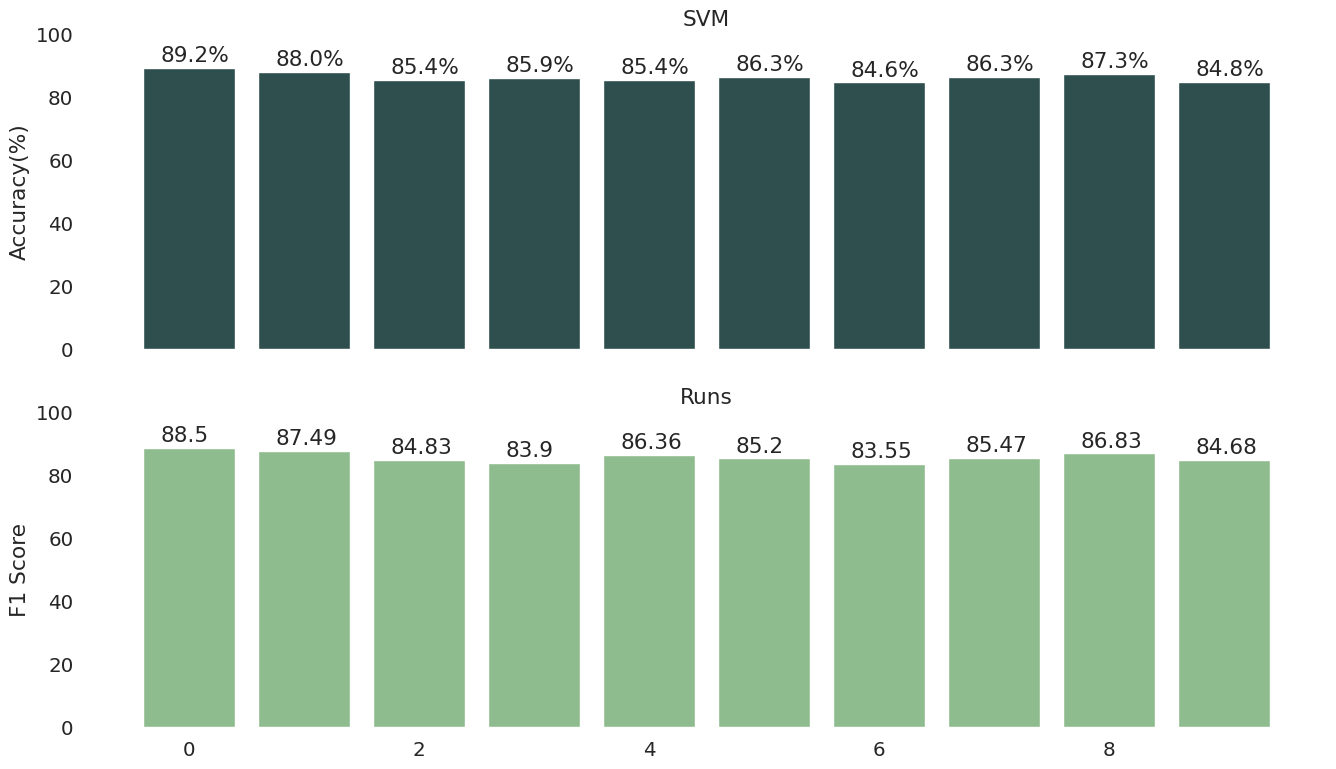

In [ ]:
#crossvalidation
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(16,9))

acc_scores = [round(a*100,1) for a in accs]
f1_scores = [round(f*100,2) for f in f1s]

x1 = np.arange(len(acc_scores))
x2 = np.arange(len(f1_scores))

ax1.bar(x1, acc_scores, color='#2F4F4F')
ax2.bar(x2, f1_scores, color = '#8FBC8F')

#Place values on top of bars
for i, v in enumerate(list(zip(acc_scores, f1_scores))):
    ax1.text(i-0.25, v[0]+2, str(v[0])+'%')
    ax2.text(i-0.25, v[1]+2, str(v[1]))

ax1.set_ylabel('Accuracy(%)')
ax1.set_title('SVM')
ax1.set_ylim([0, 100])

ax2.set_ylabel('F1 Score')
ax2.set_title('Runs')
ax2.set_ylim([0, 100])

sns.despine(bottom=True, left=True)

plt.show()


In [ ]:
df.to_csv("data_training.csv")

In [ ]:
#Data Testing
df2_komentar = pd.read_csv("Datapreprocessing.csv")
df2_komentar = pd.DataFrame(df2_komentar)
df2_komentar = df2_komentar.dropna()
df2_komentar

,Unnamed: 0,Label,Komentar,newkomentar,TOKENIZATION,STOP_REMOVAL,STEMMED
0,0,ham,slide pertama menggambarkan masa depan 🤩,slide pertama menggambarkan masa depan star s...,"['slide', 'pertama', 'menggambarkan', 'masa', ...","['slide', 'pertama', 'menggambarkan', 'masa', ...","['slide', 'pertama', 'gambar', 'masa', 'star',..."
1,1,ham,foto keluarga bgt yg slide 1 ya al😂🤣 aamiin ya...,foto keluarga bgt yg slide ya al face with t...,"['foto', 'keluarga', 'bgt', 'yg', 'slide', 'ya...","['foto', 'keluarga', 'bgt', 'yg', 'slide', 'ya...","['foto', 'keluarga', 'bgt', 'yg', 'slide', 'ya..."
2,2,ham,sukses ya al sama seriesnya. anak kecilnya gem...,sukses ya al sama seriesnya anak kecilnya gem...,"['sukses', 'ya', 'al', 'sama', 'seriesnya', 'a...","['sukses', 'ya', 'al', 'seriesnya', 'anak', 'k...","['sukses', 'ya', 'al', 'seriesnya', 'anak', 'k..."
3,3,spam,wiiii🔥,wii fire,"['wii', 'fire', '']","['wii', 'fire', '']","['wii', 'fire', '']"
4,4,ham,"lily napa cocok bgt jadi anak alamanda, mirip ...",lily napa cocok bgt jadi anak alamanda mirip ...,"['lily', 'napa', 'cocok', 'bgt', 'jadi', 'anak...","['lily', 'napa', 'cocok', 'bgt', 'jadi', 'anak...","['lily', 'napa', 'cocok', 'bgt', 'jadi', 'anak..."
...,...,...,...,...,...,...,...
2364,2796,spam,tolong dong barangkali ada yg punya solusi bua...,tolong dong barangkali ada yg punya solusi bua...,"['tolong', 'dong', 'barangkali', 'ada', 'yg', ...","['tolong', 'barangkali', 'yg', 'punya', 'solus...","['tolong', 'barangkali', 'yg', 'punya', 'solus..."
2365,2797,spam,moms sharing dong ada yang lagi program diet d...,moms sharing dong ada yang lagi program diet d...,"['moms', 'sharing', 'dong', 'ada', 'yang', 'la...","['moms', 'sharing', 'program', 'diet', 'ngilan...","['moms', 'sharing', 'program', 'diet', 'ngilan..."
2366,2798,ham,aku uda nonton banguss bangetttt 🥰🥰🥰,aku uda nonton banguss bangett smiling face w...,"['aku', 'uda', 'nonton', 'banguss', 'bangett',...","['uda', 'nonton', 'banguss', 'bangett', 'smili...","['uda', 'nonton', 'banguss', 'bangett', 'smili..."
2367,2799,ham,sudahhhhh 👏👏👏 buat yg belom wajib nonton,sudahh clapping hands clapping hands clappi...,"['sudahh', 'clapping', 'hands', 'clapping', 'h...","['sudahh', 'clapping', 'hands', 'clapping', 'h...","['sudahh', 'clapping', 'hands', 'clapping', 'h..."


In [ ]:
pd_komentar = pd.DataFrame(df2_komentar)
pd_komentar

,Unnamed: 0,Label,Komentar,newkomentar,TOKENIZATION,STOP_REMOVAL,STEMMED
0,0,ham,slide pertama menggambarkan masa depan 🤩,slide pertama menggambarkan masa depan star s...,"['slide', 'pertama', 'menggambarkan', 'masa', ...","['slide', 'pertama', 'menggambarkan', 'masa', ...","['slide', 'pertama', 'gambar', 'masa', 'star',..."
1,1,ham,foto keluarga bgt yg slide 1 ya al😂🤣 aamiin ya...,foto keluarga bgt yg slide ya al face with t...,"['foto', 'keluarga', 'bgt', 'yg', 'slide', 'ya...","['foto', 'keluarga', 'bgt', 'yg', 'slide', 'ya...","['foto', 'keluarga', 'bgt', 'yg', 'slide', 'ya..."
2,2,ham,sukses ya al sama seriesnya. anak kecilnya gem...,sukses ya al sama seriesnya anak kecilnya gem...,"['sukses', 'ya', 'al', 'sama', 'seriesnya', 'a...","['sukses', 'ya', 'al', 'seriesnya', 'anak', 'k...","['sukses', 'ya', 'al', 'seriesnya', 'anak', 'k..."
3,3,spam,wiiii🔥,wii fire,"['wii', 'fire', '']","['wii', 'fire', '']","['wii', 'fire', '']"
4,4,ham,"lily napa cocok bgt jadi anak alamanda, mirip ...",lily napa cocok bgt jadi anak alamanda mirip ...,"['lily', 'napa', 'cocok', 'bgt', 'jadi', 'anak...","['lily', 'napa', 'cocok', 'bgt', 'jadi', 'anak...","['lily', 'napa', 'cocok', 'bgt', 'jadi', 'anak..."
...,...,...,...,...,...,...,...
2364,2796,spam,tolong dong barangkali ada yg punya solusi bua...,tolong dong barangkali ada yg punya solusi bua...,"['tolong', 'dong', 'barangkali', 'ada', 'yg', ...","['tolong', 'barangkali', 'yg', 'punya', 'solus...","['tolong', 'barangkali', 'yg', 'punya', 'solus..."
2365,2797,spam,moms sharing dong ada yang lagi program diet d...,moms sharing dong ada yang lagi program diet d...,"['moms', 'sharing', 'dong', 'ada', 'yang', 'la...","['moms', 'sharing', 'program', 'diet', 'ngilan...","['moms', 'sharing', 'program', 'diet', 'ngilan..."
2366,2798,ham,aku uda nonton banguss bangetttt 🥰🥰🥰,aku uda nonton banguss bangett smiling face w...,"['aku', 'uda', 'nonton', 'banguss', 'bangett',...","['uda', 'nonton', 'banguss', 'bangett', 'smili...","['uda', 'nonton', 'banguss', 'bangett', 'smili..."
2367,2799,ham,sudahhhhh 👏👏👏 buat yg belom wajib nonton,sudahh clapping hands clapping hands clappi...,"['sudahh', 'clapping', 'hands', 'clapping', 'h...","['sudahh', 'clapping', 'hands', 'clapping', 'h...","['sudahh', 'clapping', 'hands', 'clapping', 'h..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5, max_df = 0.8, sublinear_tf = True, use_idf = True)
train_vectors = vectorizer.fit_transform(X)
test_vectors = vectorizer.transform(df2)

In [ ]:
from sklearn import svm
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors, y)
prediction_linear = classifier_linear.predict(test_vectors)

In [ ]:
result_comment=[]
for i in range(len(prediction_linear)):
    if(prediction_linear[i]==1):
      sentimen_result='ham'
    elif(prediction_linear[i]==-1):
      sentimen_result='spam'
    result_comment.append({'komentar1':pd_komentar['STEMMED'][i], 'class':prediction_linear[i]})

In [ ]:
data = pd.DataFrame(result_comment)
data

,komentar1,class
0,"['slide', 'pertama', 'gambar', 'masa', 'star',...",ham
1,"['foto', 'keluarga', 'bgt', 'yg', 'slide', 'ya...",ham
2,"['sukses', 'ya', 'al', 'seriesnya', 'anak', 'k...",ham
3,"['wii', 'fire', '']",ham
4,"['lily', 'napa', 'cocok', 'bgt', 'jadi', 'anak...",ham
5,"['slide', 'pertama', 'gemes', 'bgt', 'asa', 'l...",ham
6,"['kayak', 'emy', 'ni', 'beneran', 'anak', 'nya...",ham


In [ ]:
data.to_csv("datatesting.csv")
data

,komentar1,class
0,"['slide', 'pertama', 'gambar', 'masa', 'star',...",ham
1,"['foto', 'keluarga', 'bgt', 'yg', 'slide', 'ya...",ham
2,"['sukses', 'ya', 'al', 'seriesnya', 'anak', 'k...",ham
3,"['wii', 'fire', '']",ham
4,"['lily', 'napa', 'cocok', 'bgt', 'jadi', 'anak...",ham
5,"['slide', 'pertama', 'gemes', 'bgt', 'asa', 'l...",ham
6,"['kayak', 'emy', 'ni', 'beneran', 'anak', 'nya...",ham


In [ ]:
#Normalisasi (Pembenaran Kata)
normalisasi_kata = pd.read_csv("/content/drive/MyDrive/Dataset/normalisasi.csv")
normalisasi_kata_dict = {}

for index, row in normalisasi_kata.iterrows():
    if row[0] not in normalisasi_kata_dict:
        normalisasi_kata_dict[row[0]] = row[1]
def normalized_term(document):
    return [normalisasi_kata_dict[term] if term in normalisasi_kata_dict else term in document]
df['NORMALIZED'] = df['STEMMED'].apply(normalized_term).str.join("")
df['NORMALIZED']

NameError: ignored

In [ ]:
df.to_csv("Datapreprocessing.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
